In [1]:
%load_ext autoreload
%autoreload 1
import pandas as pd
import os
import sys
scriptpath = "binarygridsearch.py"
# Do the import
sys.path.append(os.path.abspath(scriptpath))
# Do the import
import binarygridsearch as bgs
%aimport binarygridsearch

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.tree import _tree

In [2]:
#From here: https://aysent.github.io/2015/11/08/random-forest-leaf-visualization.html
def leaf_samples(tree, node_id = 0):
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]
    
    if left_child == _tree.TREE_LEAF:
        samples = np.array([tree.n_node_samples[node_id]])
        
    else:
        
        left_samples = leaf_samples(tree, left_child)
        right_samples = leaf_samples(tree, right_child)
        
        samples = np.append(left_samples, right_samples)
        
    return samples


In [3]:
def getForestSamples(X, y, kwargs):
    clf = RandomForestClassifier(**kwargs)
    clf.fit(X, y)
    allDepths = [leaf_samples(estimator.tree_) 
                 for estimator in clf.estimators_]
    return {"min": np.hstack(allDepths).min(),
           "max": np.hstack(allDepths).max()}

In [4]:
data = load_breast_cancer()
X, y = data.data, data.target

rfArgs = {"random_state": 0,
          "n_jobs": -1,
          "class_weight": "balanced",
         "n_estimators": 18,
         "oob_score": True}

In [5]:
getForestSamples(X, y, rfArgs)

{'min': 1, 'max': 199}

In [7]:
def getForestAccuracy(X, y, metric, kwargs):
    clf = RandomForestClassifier(**kwargs)
    clf.fit(X, y)
    y_pred = clf.oob_decision_function_[:, 1]
    return metric(y, y_pred)

,min_samples_leaf,score,time,scoreTimeRatio
0,1,0.995407,1.003646,0.003532
1,199,0.001826,0.082002,0.000000
2,100,0.990774,0.005891,0.612559
3,51,0.999124,0.017244,0.210991
4,26,1.001826,0.010988,0.332059
5,39,1.000837,0.003646,1.000000
6,33,1.001175,0.007178,0.508004
7,30,0.999413,0.068068,0.053406
8,28,1.000933,0.019286,0.188988


,min_samples_leaf,score,time
0,1,0.980736,0.405092
1,199,0.436711,0.152287
2,100,0.978199,0.131410
3,51,0.982770,0.134524
4,26,0.984250,0.132808
5,39,0.983709,0.130794
6,33,0.983894,0.131763
7,30,0.982929,0.148465
8,28,0.983761,0.135084


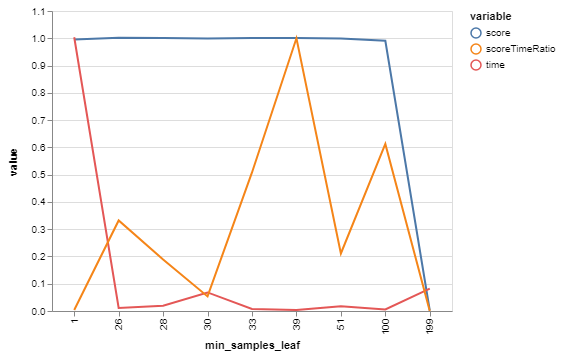

In [8]:
min_samples_leaf = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracy,        
                    rfArgs, 
                    roc_auc_score, 
                    "min_samples_leaf", 
                    0, 
                    1, 
                    199)
bgs.showTimeScoreChartAndGraph(min_samples_leaf)

,min_samples_leaf,score,time,scoreTimeRatio
0,1,0.170459,1.046997,0.000000
1,26,0.769559,0.046997,1.000000
2,13,1.170459,0.416674,0.163229
3,7,0.491405,0.965598,0.021349
4,10,0.539829,0.137043,0.232935
5,11,0.806721,0.302566,0.154421


,min_samples_leaf,score,time
0,1,0.980736,0.155192
1,26,0.984250,0.133914
2,13,0.986602,0.141780
3,7,0.982619,0.153460
4,10,0.982903,0.135830
5,11,0.984468,0.139352


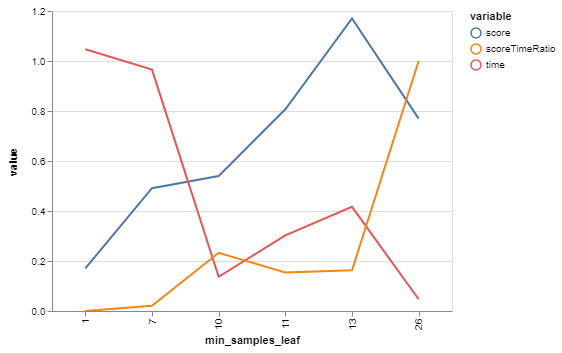

In [9]:
min_samples_leaf = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracy,        
                    rfArgs, 
                    roc_auc_score, 
                    "min_samples_leaf", 
                    0, 
                    1, 
                    26)
bgs.showTimeScoreChartAndGraph(min_samples_leaf)